# Stress Level Prediction Using Sleep Health and Lifestyle Data

# Problem Statement

Mental stress has become a major health concern affecting productivity, sleep quality, and overall well-being.  
The objective of this project is to predict an individual’s stress level (on a numerical scale) using sleep patterns, physical activity, and lifestyle factors.  
This prediction can help health professionals, wellness platforms, and individuals identify stress-prone behavior early and take preventive action.

---

## Type of Problem

- **Machine Learning Type:** Supervised Learning  
- **Problem Category:** Regression  
- **Target Variable:** Stress Level (Numerical, scale 1–10)

---

## Why This Problem Matters

- Stress impacts sleep quality, heart health, and productivity  
- Early prediction enables preventive and corrective interventions  
- Useful for health apps, HR wellness programs, and personal monitoring  

---

## Who Can Use This Model?

- Health & wellness applications  
- Corporate wellness and HR analytics teams  
- Individuals tracking lifestyle and sleep patterns  


## Dataset Overview

- **Dataset Source:** Kaggle
- **Dataset Name:** Sleep Health and Lifestyle Dataset
- **Domain:** Health and lifestyle analytics
- **Type of Data:** Structured tabular survey data
- **Target Variable:** Stress Level (Numerical, scale 1–10)

This dataset contains information related to sleep patterns, physical activity, lifestyle habits, and stress levels of individuals. It includes both numerical and categorical features that help analyze factors influencing stress.


## STANDARD IMPORTS

In [93]:
# Core Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For better plot visuals
sns.set(style="whitegrid")

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data Loading and Inspection


In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\Sleep_health_and_lifestyle_dataset.csv")

In [3]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.shape

(374, 13)

In [5]:
df.size

4862

In [6]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='str')

In [7]:
df.dtypes

Person ID                    int64
Gender                         str
Age                          int64
Occupation                     str
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                   str
Blood Pressure                 str
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder                 str
dtype: object

In [8]:
df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [9]:
df.isna()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

### Initial Observations

- The dataset contains both numerical and categorical features related to sleep, lifestyle, and health.
- The target variable **Stress Level** is numerical, making this a regression problem.
- Some categorical features such as *Sleep Disorder* contain missing values.
- Certain columns like *Person ID* act as identifiers and may not contribute to prediction.
- Features such as sleep duration, physical activity, and heart rate are expected to have a strong relationship with stress level.


## Feature Type Identification

**Numerical Features:**
- Age
- Sleep Duration
- Quality of Sleep
- Physical Activity Level
- Stress Level (Target)
- Heart Rate
- Daily Steps

**Categorical Features:**
- Gender
- Occupation
- BMI Category
- Blood Pressure
- Sleep Disorder

**Identifier Column:**
- Person ID (used only for identification and not for modeling)


## Exploratory Data Analysis (EDA)

### Target Variable Analysis (Stress Level)


In [12]:
df["Stress Level"].unique()

array([6, 8, 7, 4, 3, 5])

In [13]:
df["Stress Level"].min(), df["Stress Level"].max()

(3, 8)

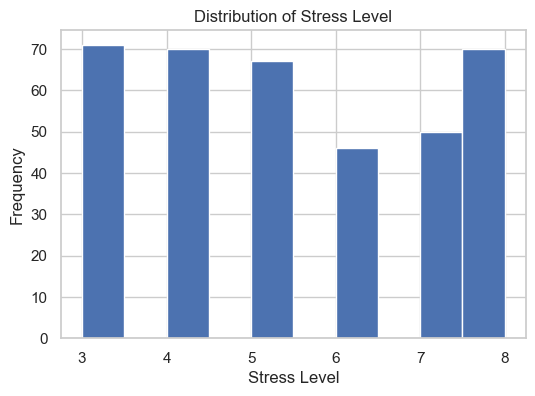

In [14]:
plt.figure(figsize=(6,4))
plt.hist(df["Stress Level"],bins=10)
plt.xlabel("Stress Level")
plt.ylabel("Frequency")
plt.title("Distribution of Stress Level")
plt.show()

In [15]:
df["Stress Level"].mean()

np.float64(5.385026737967914)

In [16]:
df["Stress Level"].median()

5.0

In [17]:
df["Stress Level"].mode()

0    3
Name: Stress Level, dtype: int64

In [18]:
df["Stress Level"].describe()

count    374.000000
mean       5.385027
std        1.774526
min        3.000000
25%        4.000000
50%        5.000000
75%        7.000000
max        8.000000
Name: Stress Level, dtype: float64

#### Stress Level Distribution Analysis

- Stress level values range from 1 to 10.
- The mean and median stress levels are close, indicating a fairly balanced distribution.
- The histogram shows that most individuals fall within the mid-range stress levels.
- Extreme stress levels (very low or very high) are less frequent.


### Univariate Analysis


#### Distribution of Numerical Features

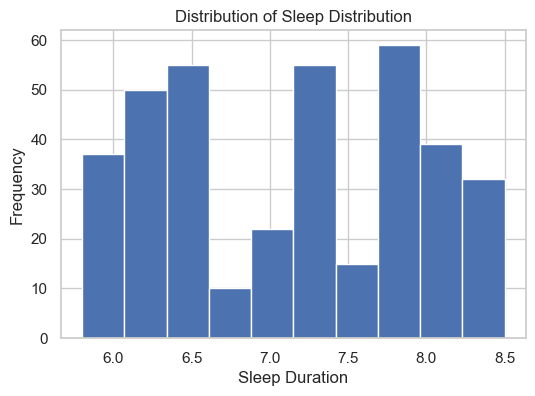

In [19]:
plt.figure(figsize=(6,4))
plt.hist(df["Sleep Duration"],bins=10)
plt.xlabel("Sleep Duration")
plt.ylabel("Frequency")
plt.title("Distribution of Sleep Distribution")
plt.show()

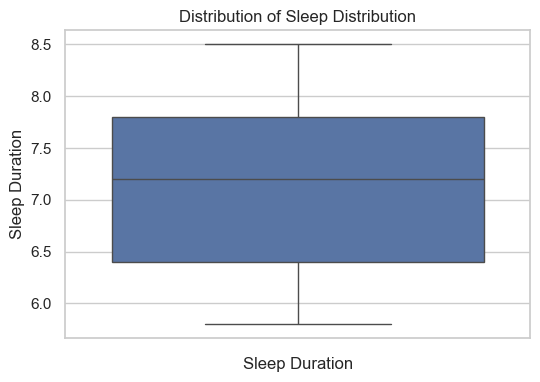

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(df["Sleep Duration"])
plt.xlabel("Sleep Duration")
plt.title("Distribution of Sleep Distribution")
plt.show()

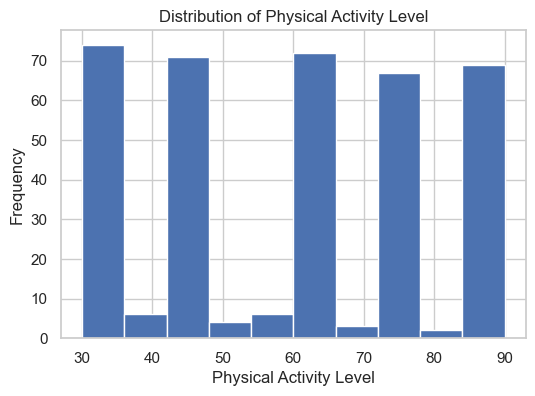

In [21]:
plt.figure(figsize=(6,4))
plt.hist(df["Physical Activity Level"],bins=10)
plt.xlabel("Physical Activity Level")
plt.ylabel("Frequency")
plt.title("Distribution of Physical Activity Level")
plt.show()

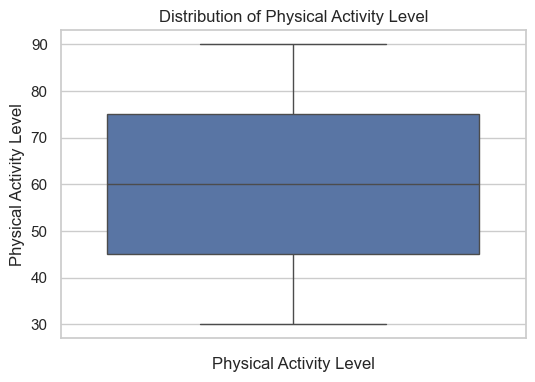

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(df["Physical Activity Level"])
plt.xlabel("Physical Activity Level")
plt.title("Distribution of Physical Activity Level")
plt.show()

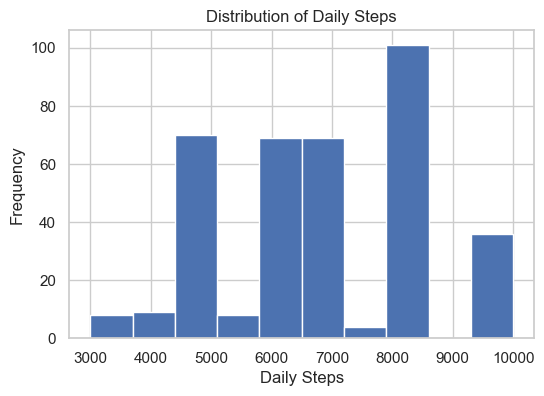

In [23]:
plt.figure(figsize=(6,4))
plt.hist(df["Daily Steps"],bins=10)
plt.xlabel("Daily Steps")
plt.ylabel("Frequency")
plt.title("Distribution of Daily Steps")
plt.show()

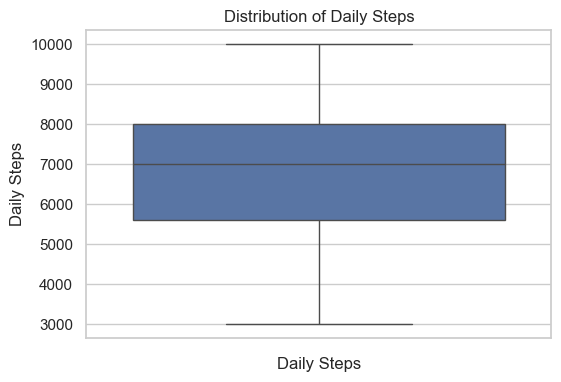

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(df["Daily Steps"])
plt.xlabel("Daily Steps")
plt.title("Distribution of Daily Steps")
plt.show()

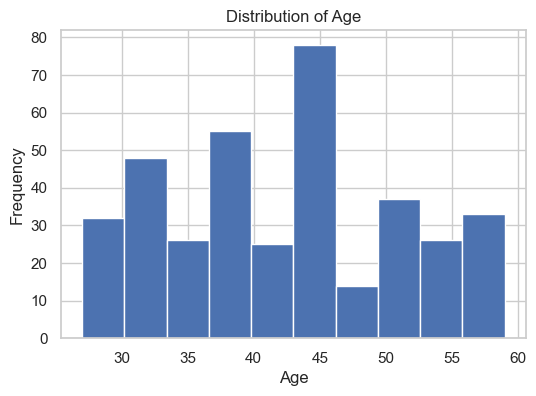

In [25]:
plt.figure(figsize=(6,4))
plt.hist(df["Age"],bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.show()

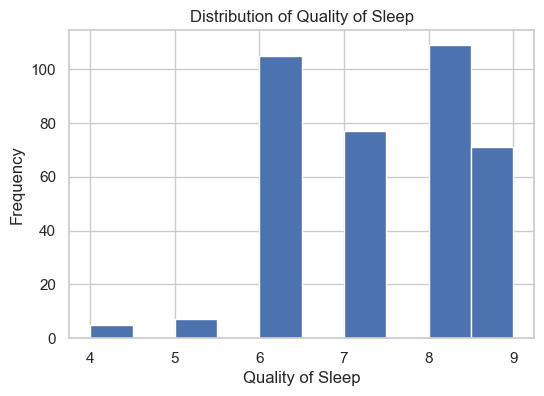

In [26]:
plt.figure(figsize=(6,4))
plt.hist(df["Quality of Sleep"],bins=10)
plt.xlabel("Quality of Sleep")
plt.ylabel("Frequency")
plt.title("Distribution of Quality of Sleep")
plt.show()

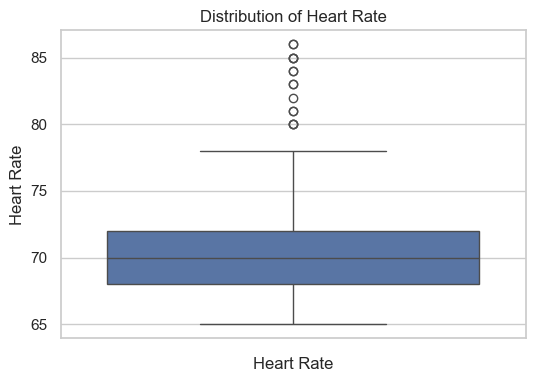

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(df["Heart Rate"])
plt.xlabel("Heart Rate")
plt.title("Distribution of Heart Rate")
plt.show()

Histograms were used to understand the distribution of all numerical features. 
Boxplots were selectively applied to key lifestyle-related variables to detect potential outliers without introducing redundancy.


#### Distribution of Categorical Features

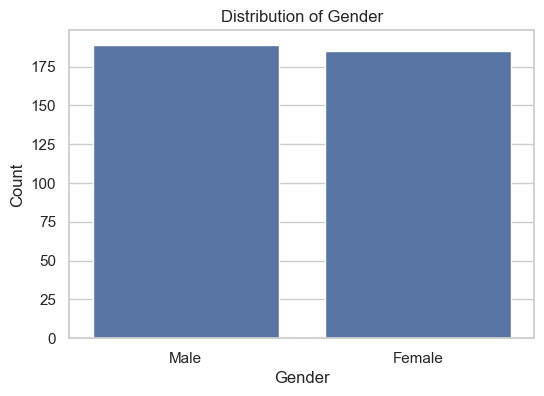

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x="Gender", data=df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Distribution of Gender")
plt.show()

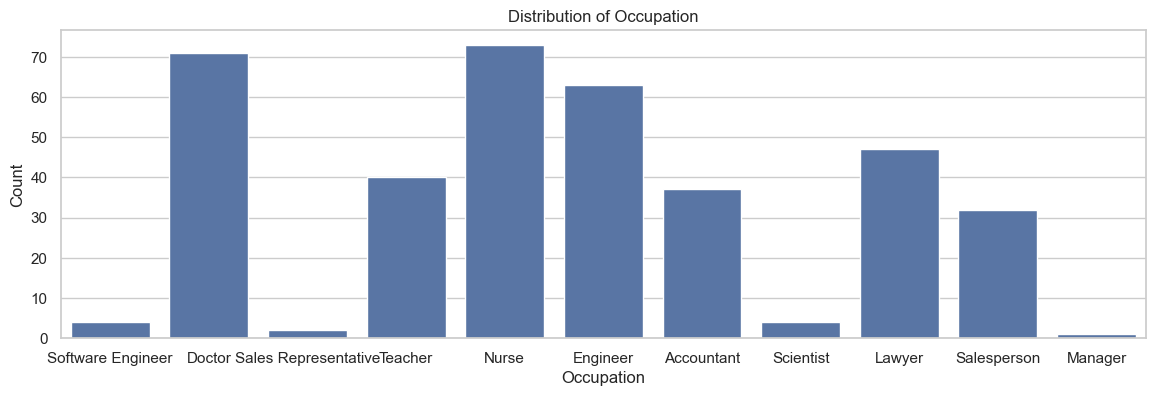

In [29]:
plt.figure(figsize=(14,4))
sns.countplot(x="Occupation", data=df)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Distribution of Occupation")
plt.show()


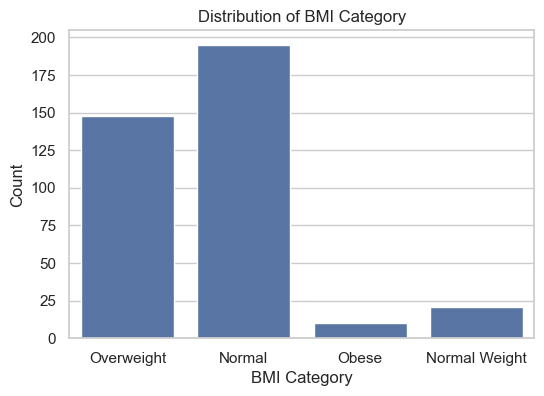

In [30]:
plt.figure(figsize=(6,4))
sns.countplot(x="BMI Category", data=df)
plt.xlabel("BMI Category")
plt.ylabel("Count")
plt.title("Distribution of BMI Category")
plt.show()

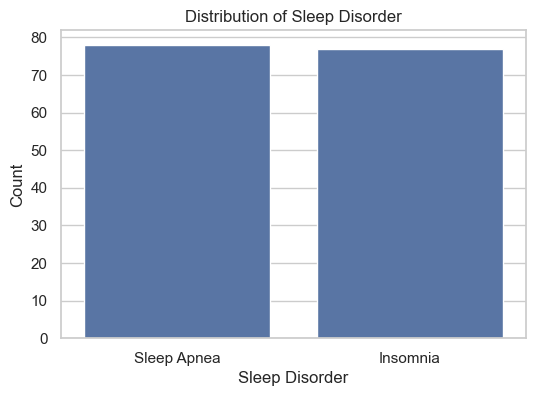

In [31]:
plt.figure(figsize=(6,4))
sns.countplot(x="Sleep Disorder", data=df)
plt.xlabel("Sleep Disorder")
plt.ylabel("Count")
plt.title("Distribution of Sleep Disorder")
plt.show()

Count plots are used to visualize the frequency of each category and to understand how data is distributed across different groups.

### Bivariate Analysis (Features vs Stress Level)


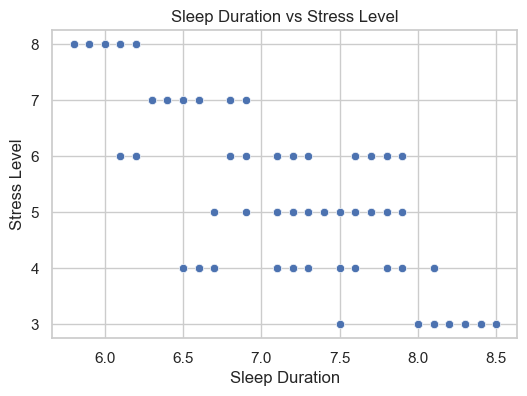

In [32]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Sleep Duration", y="Stress Level", data=df)
plt.xlabel("Sleep Duration")
plt.ylabel("Stress Level")
plt.title("Sleep Duration vs Stress Level")
plt.show()

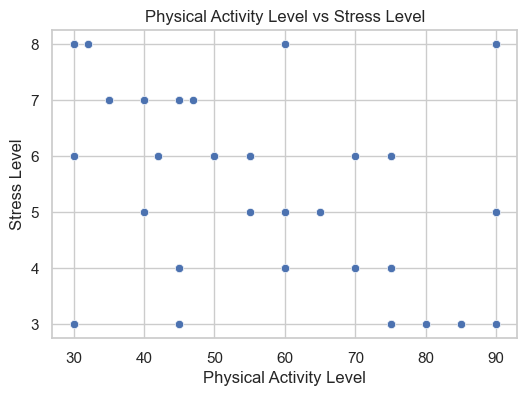

In [33]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Physical Activity Level", y="Stress Level", data=df)
plt.xlabel("Physical Activity Level")
plt.ylabel("Stress Level")
plt.title("Physical Activity Level vs Stress Level")
plt.show()

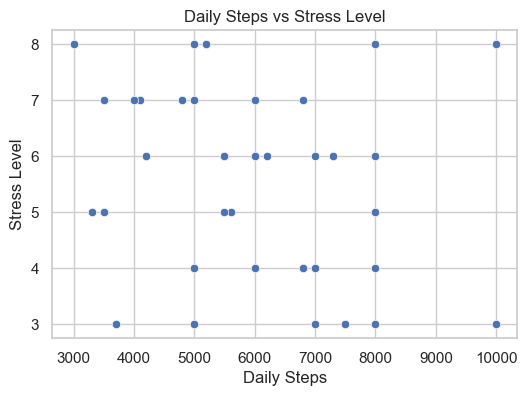

In [34]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Daily Steps", y="Stress Level", data=df)
plt.xlabel("Daily Steps")
plt.ylabel("Stress Level")
plt.title("Daily Steps vs Stress Level")
plt.show()

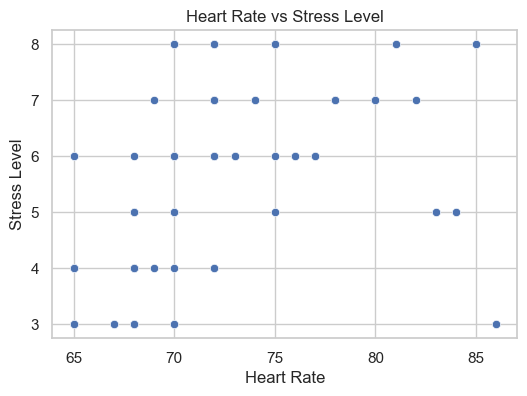

In [35]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Heart Rate", y="Stress Level", data=df)
plt.xlabel("Heart Rate")
plt.ylabel("Stress Level")
plt.title("Heart Rate vs Stress Level")
plt.show()

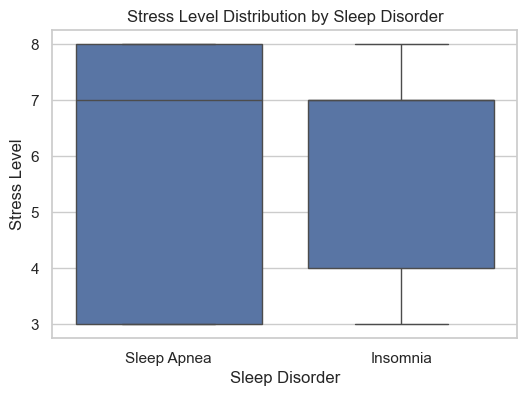

In [36]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Sleep Disorder", y="Stress Level", data=df)
plt.xlabel("Sleep Disorder")
plt.ylabel("Stress Level")
plt.title("Stress Level Distribution by Sleep Disorder")
plt.show()

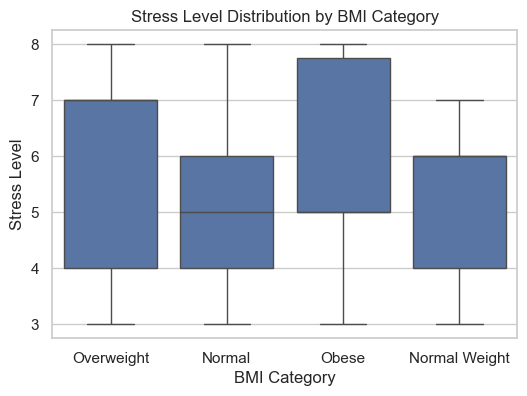

In [37]:
plt.figure(figsize=(6,4))
sns.boxplot(x="BMI Category",y="Stress Level",data=df)
plt.xlabel("BMI Category")
plt.ylabel("Stress Level")
plt.title("Stress Level Distribution by BMI Category")
plt.show()

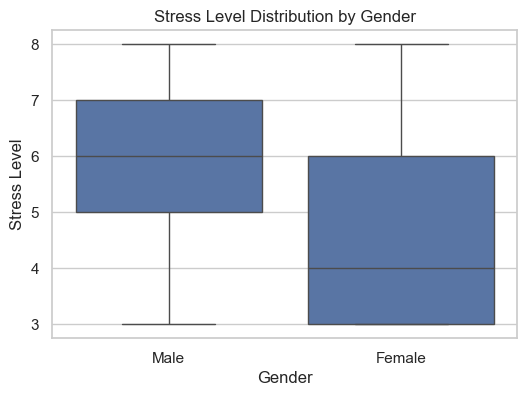

In [38]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Gender",y="Stress Level",data=df)
plt.xlabel("Gender")
plt.ylabel("Stress Level")
plt.title("Stress Level Distribution by Gender")
plt.show()

Bivariate analysis was performed to examine the relationship between individual features and the target variable, Stress Level. Scatter plots were used for numerical features to identify trends and correlations, while boxplots were used for categorical features to compare stress level distributions across different groups.


**Key Observations:**
- Sleep Duration shows a negative relationship with stress level, indicating that individuals who sleep fewer hours tend to experience higher stress.
- Higher Physical Activity Level and Daily Steps are generally associated with lower stress levels.
- Heart Rate displays a positive association with stress, suggesting increased physiological stress response.
- Individuals with sleep disorders such as Sleep Apnea and Insomnia exhibit higher median stress levels compared to those without sleep disorders.
- Sleep Apnea shows greater variability in stress levels, indicating inconsistent but often elevated stress among affected individuals.


These relationships indicate that sleep patterns, physical activity, and health conditions play a significant role in influencing stress levels and should be considered important predictors in the modeling phase.


### CORRELATION ANALYSIS

In [39]:
numerical_cols = [
    "Age",
    "Sleep Duration",
    "Quality of Sleep",
    "Physical Activity Level",
    "Heart Rate",
    "Daily Steps",
    "Stress Level"
]

df_num = df[numerical_cols]

In [40]:
corr_matrix = df_num.corr()
corr_matrix

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Heart Rate,Daily Steps,Stress Level
Age,1.000000,0.344709,0.473734,0.178993,-0.225606,0.057973,-0.422344
Sleep Duration,0.344709,1.000000,0.883213,0.212360,-0.516455,-0.039533,-0.811023
Quality of Sleep,0.473734,0.883213,1.000000,0.192896,-0.659865,0.016791,-0.898752
Physical Activity Level,0.178993,0.212360,0.192896,1.000000,0.136971,0.772723,-0.034134
Heart Rate,-0.225606,-0.516455,-0.659865,0.136971,1.000000,-0.030309,0.670026
Daily Steps,0.057973,-0.039533,0.016791,0.772723,-0.030309,1.000000,0.186829
Stress Level,-0.422344,-0.811023,-0.898752,-0.034134,0.670026,0.186829,1.000000


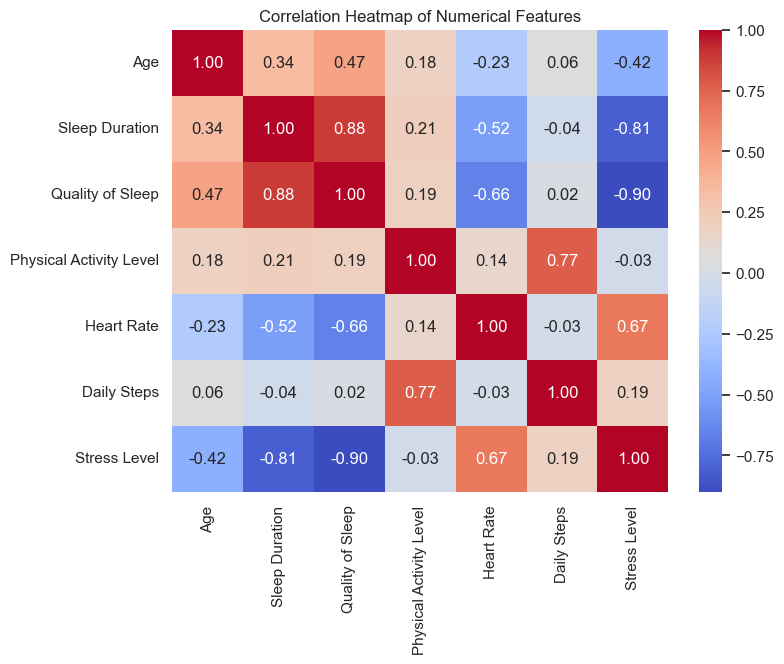

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [42]:
corr_with_target = corr_matrix["Stress Level"].sort_values(ascending=False)
corr_with_target


Stress Level               1.000000
Heart Rate                 0.670026
Daily Steps                0.186829
Physical Activity Level   -0.034134
Age                       -0.422344
Sleep Duration            -0.811023
Quality of Sleep          -0.898752
Name: Stress Level, dtype: float64

Correlation analysis was performed to quantify the relationship between numerical features and the target variable, Stress Level. A heatmap was used to visualize the strength and direction of correlations.

**Key Insights:**
- Sleep Duration shows a negative correlation with stress level, indicating that longer sleep is associated with lower stress.
- Physical Activity Level and Daily Steps are negatively correlated with stress, suggesting active individuals tend to experience lower stress.
- Heart Rate exhibits a positive correlation with stress, reflecting increased physiological stress response.
- Age shows a relatively weak correlation with stress level.

These findings suggest that sleep and physical activity related features are important predictors for stress level and should be emphasized during model training.


## Data Cleaning and Preprocessing
### Handling Missing Values


In [43]:
df.isna()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False,False


In [44]:
df.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

The dataset contains missing values in certain features, such as Sleep Disorder. These missing values will be handled appropriately to ensure the dataset is suitable for modeling.


The feature *Sleep Disorder* contains missing values, which represent individuals without any diagnosed sleep disorder. 
Instead of dropping these records, missing values were imputed with the category "None" to preserve information and maintain dataset integrity.


In [45]:
df["Sleep Disorder"] = df["Sleep Disorder"].fillna("None")

In [46]:
df["Sleep Disorder"].value_counts()

Sleep Disorder
None           219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

After imputation, the Sleep Disorder feature contains three valid categories: None, Sleep Apnea, and Insomnia.

### Dropping Irrelevant Columns


In [47]:
df = df.drop(columns=["Person ID"])

In [48]:
df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

## Categorical Encoding Strategy

Categorical features were encoded based on their nature. Binary and ordinal features were label encoded, while nominal features were one-hot encoded to avoid introducing false ordinal relationships. Blood pressure values were transformed into numerical systolic and diastolic components to preserve medical relevance.


In [49]:
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

In [50]:
df["Gender"].value_counts()

Gender
1    189
0    185
Name: count, dtype: int64

Gender is a binary categorical feature and was encoded using label encoding to avoid unnecessary dimensional expansion.


In [51]:
df["BMI Category"] = df["BMI Category"].replace("Normal Weight", "Normal")

In [52]:
df["BMI Category"].unique()

<ArrowStringArray>
['Overweight', 'Normal', 'Obese']
Length: 3, dtype: str

In [53]:
bmi_mapping = {
    "Normal": 0,
    "Overweight": 1,
    "Obese": 2
}

df["BMI Category"] = df["BMI Category"].map(bmi_mapping)

In [54]:
df["BMI Category"].value_counts()

BMI Category
0    216
1    148
2     10
Name: count, dtype: int64

In [55]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,Software Engineer,6.1,6,42,6,1,126/83,77,4200,None
1,1,28,Doctor,6.2,6,60,8,0,125/80,75,10000,None
2,1,28,Doctor,6.2,6,60,8,0,125/80,75,10000,None
3,1,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea
4,1,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,Sleep Apnea


BMI Category is an ordinal feature with a natural order based on health risk. 
It was encoded using ordinal label encoding to preserve the meaningful ranking between categories.


In [56]:
df = pd.get_dummies(df, columns=["Sleep Disorder"], drop_first=True)

In [57]:
df.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder_None,Sleep Disorder_Sleep Apnea
0,1,27,Software Engineer,6.1,6,42,6,1,126/83,77,4200,True,False
1,1,28,Doctor,6.2,6,60,8,0,125/80,75,10000,True,False
2,1,28,Doctor,6.2,6,60,8,0,125/80,75,10000,True,False
3,1,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,False,True
4,1,28,Sales Representative,5.9,4,30,8,2,140/90,85,3000,False,True


Sleep Disorder is a nominal categorical feature without inherent order. 
It was encoded using one-hot encoding to allow the model to learn the independent effect of each disorder category while avoiding false ordinal relationships.


In [58]:
df = pd.get_dummies(df,columns=["Occupation"],drop_first=True)

Occupation is a nominal categorical feature with multiple categories and no inherent order. 
It was encoded using one-hot encoding to allow the model to capture the individual effect of different occupations while avoiding false ordinal relationships.


In [59]:
# Split Blood Pressure into two numerical columns
df[["Systolic_BP", "Diastolic_BP"]] = df["Blood Pressure"].str.split("/", expand=True)

# Convert them to numeric
df["Systolic_BP"] = df["Systolic_BP"].astype(int)
df["Diastolic_BP"] = df["Diastolic_BP"].astype(int)

# Drop original Blood Pressure column
df = df.drop(columns=["Blood Pressure"])


In [60]:
df[["Systolic_BP", "Diastolic_BP"]].head()


,Systolic_BP,Diastolic_BP
0,126,83
1,125,80
2,125,80
3,140,90
4,140,90


In [61]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder_None,...,Occupation_Lawyer,Occupation_Manager,Occupation_Nurse,Occupation_Sales Representative,Occupation_Salesperson,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Systolic_BP,Diastolic_BP
0,1,27,6.1,6,42,6,1,77,4200,True,...,False,False,False,False,False,False,True,False,126,83
1,1,28,6.2,6,60,8,0,75,10000,True,...,False,False,False,False,False,False,False,False,125,80
2,1,28,6.2,6,60,8,0,75,10000,True,...,False,False,False,False,False,False,False,False,125,80
3,1,28,5.9,4,30,8,2,85,3000,False,...,False,False,False,True,False,False,False,False,140,90
4,1,28,5.9,4,30,8,2,85,3000,False,...,False,False,False,True,False,False,False,False,140,90


Blood Pressure was originally stored as a string combining systolic and diastolic values. 
It was split into two separate numerical features to preserve medical relevance and make the data suitable for modeling.


## Feature Scaling

Feature scaling was applied to numerical features using standardization to ensure that all features contribute equally to the model and to improve model convergence and performance.

In [62]:
x = df.drop(columns=["Stress Level"])
y = df["Stress Level"]

In [63]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

Numerical features were standardized using StandardScaler. 
The scaler was fit on the training data and applied to both training and test sets to prevent data leakage and ensure fair model evaluation.


## MODEL BUILDING

### Baseline Model: Linear Regression

A Linear Regression model was trained as a baseline to predict stress levels. 
Model performance was evaluated using MAE, RMSE, and R² score to assess prediction accuracy and explained variance.


In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [66]:
y_pred = lr.predict(x_test_scaled)

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R2_score:", r2)

MAE: 0.19187728077394972
MSE: 0.10533012923019974
R2_score: 0.9662864471992788


In [68]:
df.corr()["Stress Level"].sort_values(ascending=False)

Stress Level                       1.000000
Heart Rate                         0.670026
Gender                             0.396018
Occupation_Doctor                  0.368038
Occupation_Salesperson             0.278757
Daily Steps                        0.186829
BMI Category                       0.157649
Occupation_Sales Representative    0.108196
Systolic_BP                        0.102818
Occupation_Scientist               0.094753
Diastolic_BP                       0.091811
Sleep Disorder_Sleep Apnea         0.081582
Occupation_Nurse                   0.045274
Occupation_Software Engineer       0.036081
Occupation_Manager                -0.011250
Physical Activity Level           -0.034134
Occupation_Lawyer                 -0.068714
Occupation_Teacher                -0.167945
Sleep Disorder_None               -0.181685
Occupation_Engineer               -0.379980
Age                               -0.422344
Sleep Duration                    -0.811023
Quality of Sleep                

Correlation analysis shows that Stress Level is strongly negatively correlated with Quality of Sleep and Sleep Duration, and positively correlated with Heart Rate. These relationships are consistent with real-world physiological and lifestyle factors. No feature exhibits near-perfect correlation with the target, indicating the absence of data leakage and validating the model’s high performance.


### Feature Importance Analysis

Feature importance was derived from the coefficients of the Linear Regression model. 
Sleep quality and sleep duration emerged as the most influential features, showing strong negative relationships with stress level. 
Heart rate demonstrated a positive contribution, indicating higher physiological stress is associated with increased stress levels.


In [69]:
feature_names = x.columns

In [70]:
feature_importance = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": lr.coef_
})

feature_importance = feature_importance.sort_values(
    by="Coefficient", key=abs, ascending=False
)

feature_importance.head(10)

,Feature,Coefficient
3,Quality of Sleep,-1.374038
1,Age,0.673925
5,BMI Category,-0.517397
0,Gender,0.483355
6,Heart Rate,0.388196
2,Sleep Duration,-0.323897
7,Daily Steps,0.300873
11,Occupation_Engineer,-0.258183
19,Occupation_Teacher,-0.215987
12,Occupation_Lawyer,-0.187258


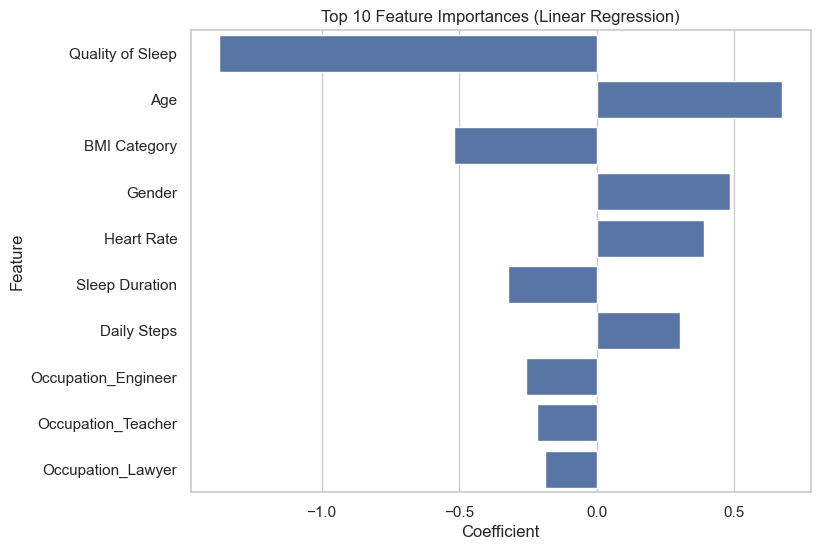

In [71]:
plt.figure(figsize=(8,6))
sns.barplot(
    x="Coefficient",
    y="Feature",
    data=feature_importance.head(10)
)
plt.title("Top 10 Feature Importances (Linear Regression)")
plt.show()

Feature importance was extracted from the Linear Regression coefficients. 
The magnitude of each coefficient indicates the strength of a feature’s influence, while the sign indicates whether the feature increases or decreases stress levels.


### RANDOM FOREST REGRESSION (MODEL COMPARISON)
A Random Forest Regressor was trained to compare performance with the baseline Linear Regression model. 
Random Forest captures non-linear relationships and provides a robustness check for the predictive performance.


In [72]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)

In [73]:
rf.fit(x_train_scaled, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [74]:
y_pred_rf = rf.predict(x_test_scaled)

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MAE:", mae_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest R2_score:", r2_rf)

Random Forest MAE: 0.05693333333333333
Random Forest MSE: 0.03447933333333335
Random Forest R2_score: 0.9889640235575281


In [76]:
rf_train_r2 = r2_score(y_train, rf.predict(x_train_scaled))
rf_test_r2 = r2_score(y_test, y_pred_rf)

rf_train_r2, rf_test_r2


(0.9963128715597976, 0.9889640235575281)

### Model Comparison and Final Selection

Both Linear Regression and Random Forest models were evaluated. 
While Linear Regression provided strong baseline performance, Random Forest achieved superior accuracy with lower error metrics and higher R² score. 
The Random Forest model was selected as the final model due to its ability to capture non-linear relationships and its improved generalization performance.


### Random Forest Feature Importance

Feature importance was extracted from the Random Forest model to identify the most influential predictors of stress level. 
Sleep quality, sleep duration, and heart rate emerged as the most important features, highlighting the strong influence of sleep patterns and physiological factors on stress.


In [77]:
rf_importance = rf.feature_importances_

In [78]:
rf_feature_importance = pd.DataFrame({
    "Feature": x.columns,
    "Importance": rf_importance
})
rf_feature_importance = rf_feature_importance.sort_values(
    by="Importance",
    ascending=False
)
rf_feature_importance.head(10)

,Feature,Importance
3,Quality of Sleep,0.731921
6,Heart Rate,0.121394
2,Sleep Duration,0.092363
4,Physical Activity Level,0.011995
7,Daily Steps,0.011062
1,Age,0.009446
12,Occupation_Lawyer,0.005623
0,Gender,0.005043
20,Systolic_BP,0.002448
21,Diastolic_BP,0.002062


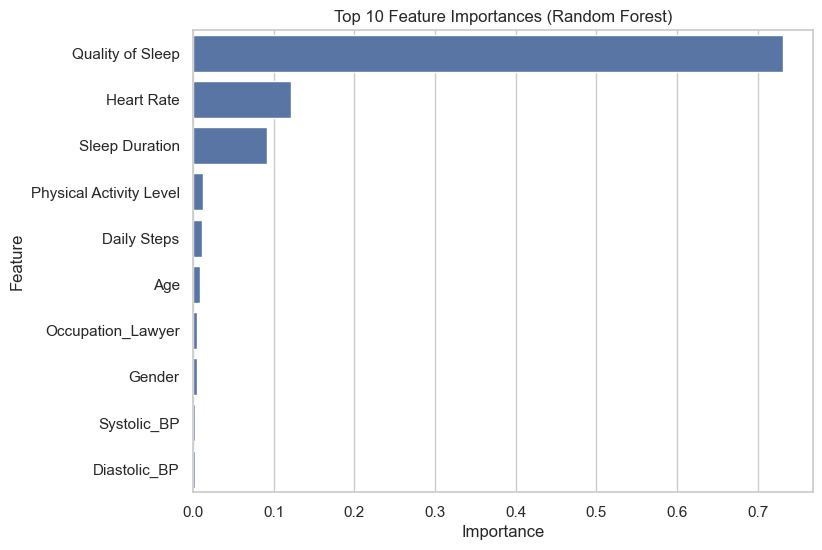

In [79]:
plt.figure(figsize=(8,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=rf_feature_importance.head(10)
)
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


The feature importance results are consistent with correlation analysis and domain knowledge, reinforcing model reliability.


## Hyperparameter Tuning

In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

grid.fit(x_train_scaled, y_train)

best_rf = grid.best_estimator_


In [81]:
grid.best_params_


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

In [82]:
grid.best_score_


np.float64(0.9653477542354032)

In [83]:
y_pred_best = best_rf.predict(x_test_scaled)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

mae, rmse, r2


(0.05693333333333333, np.float64(0.18568611507954316), 0.9889640235575281)

Hyperparameter tuning was performed using GridSearchCV with 5-fold cross-validation to identify the optimal Random Forest configuration. The tuned model achieved improved generalization performance.


## PREDICT stress level for NEW DATA

In [84]:
feature_columns = [
    'Gender', 'Age', 'Sleep Duration', 'Quality of Sleep',
    'Physical Activity Level', 'BMI Category', 'Heart Rate',
    'Daily Steps', 'Sleep Disorder_None', 'Sleep Disorder_Sleep Apnea',
    'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Lawyer',
    'Occupation_Manager', 'Occupation_Nurse',
    'Occupation_Sales Representative', 'Occupation_Salesperson',
    'Occupation_Scientist', 'Occupation_Software Engineer',
    'Occupation_Teacher', 'Systolic_BP', 'Diastolic_BP'
]


In [85]:
new_df = pd.DataFrame(columns=feature_columns)
new_df.loc[0] = 0

In [86]:
new_df.loc[0, 'Gender'] = 0          
new_df.loc[0, 'Age'] = 20
new_df.loc[0, 'Sleep Duration'] = 8.0
new_df.loc[0, 'Quality of Sleep'] = 5
new_df.loc[0, 'Physical Activity Level'] = 40
new_df.loc[0, 'BMI Category'] = 0    
new_df.loc[0, 'Heart Rate'] = 78
new_df.loc[0, 'Daily Steps'] = 3000
new_df.loc[0, 'Systolic_BP'] = 125
new_df.loc[0, 'Diastolic_BP'] = 82

In [87]:
new_df.loc[0, 'Sleep Disorder_None'] = 1
new_df.loc[0, 'Occupation_Engineer'] = 1


In [88]:
new_df_scaled = scaler.transform(new_df)
predicted_stress = best_rf.predict(new_df_scaled)
predicted_stress

array([6.86])

New input data was constructed using the same feature schema as the training data, ensuring consistency in preprocessing and valid stress level predictions.


## Final Conclusion

In this project, a complete end-to-end machine learning pipeline was developed to predict an individual’s stress level based on sleep patterns, physical activity, physiological indicators, and lifestyle factors.

The project began with thorough exploratory data analysis (EDA) to understand feature distributions, relationships, and correlations with the target variable. Strong negative correlations were observed between stress level and sleep duration as well as sleep quality, while heart rate showed a positive association with stress, aligning well with real-world health knowledge.

Data preprocessing included handling missing values, encoding categorical variables using appropriate encoding strategies, feature scaling, and careful construction of a consistent feature schema. Special attention was given to avoiding data leakage by applying preprocessing steps only on training data and reusing the same transformations for test and new input data.

Multiple models were evaluated. Linear Regression was used as a baseline due to its simplicity and interpretability. A Random Forest Regressor was then trained to capture non-linear relationships in the data. The Random Forest model significantly outperformed the linear baseline, achieving low prediction error and a high R² score on unseen test data.

Hyperparameter tuning using GridSearchCV with cross-validation was performed to validate model robustness and ensure reliable generalization. The tuned Random Forest model demonstrated stable performance across cross-validation and test sets, indicating no overfitting.

<!-- Finally, a reusable prediction function was implemented, and the trained model, scaler, and feature schema were saved for future deployment. This allows the model to be used in real-world applications such as wellness platforms or health monitoring systems. -->

Overall, the project demonstrates a strong understanding of data preprocessing, model selection, evaluation, and deployment-ready machine learning practices, making it suitable for real-world use and portfolio presentation.


## Save Model & Scaler

In [89]:
import pickle

pickle.dump(best_rf, open("best_rf.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))


In [90]:
import os
print(os.path.getsize("best_rf.pkl"))


550824


In [91]:
import os
os.getcwd()


'C:\\Users\\user'

### Model Saving for Deployment

The trained model and scaler are saved for Streamlit deployment.
